* Name: **Vu Truong Si**
* Github: **vutruong99**
* USC ID: **6031936649**

In [13]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import random
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import statistics
from sklearn.cluster import KMeans
import numpy as np
from collections import Counter
from sklearn.cluster import SpectralClustering
from sklearn.cluster import spectral_clustering
import warnings
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings('ignore')

**1. Supervised, Semi-Supervised, and Unsupervised Learning**

**(a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+
%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/
machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which
has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has
two output classes.**

In [14]:
# Get feature names.

features_30 = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave points", "symmetry", "fractal dimension"]

column_names = ["ID Number", "Diagnosis"]

for i in range(3):
    for feature in features_30:
        column_names.append(feature + "_" + str(i+1))

In [15]:
dataframe = pd.read_csv('../data/wdbc.data', names = column_names)

In [16]:
dataframe

,ID Number,Diagnosis,radius_1,texture_1,perimeter_1,area_1,smoothness_1,compactness_1,concavity_1,concave points_1,...,radius_3,texture_3,perimeter_3,area_3,smoothness_3,compactness_3,concavity_3,concave points_3,symmetry_3,fractal dimension_3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [17]:
# Ínpect class counts.

dataframe["Diagnosis"].value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

In [18]:
# Map Malign and Benign to 1 and 0.

dataframe['Diagnosis'] = dataframe['Diagnosis'].map({'M': 1, 'B': 0})

In [19]:
# Get X and y from the data.

X = dataframe.drop(["Diagnosis", "ID Number"], axis = 1)
y = dataframe[["Diagnosis"]]

**(b) Monte-Carlo Simulation**

**i. Supervised Learning: Train an L1-penalized SVM to classify the data.
Use 5 fold cross validation to choose the penalty parameter. Use normalized
data. Report the average accuracy, precision, recall, F1-score, and AUC, for
both training and test sets over your M runs. Plot the ROC and report the
confusion matrix for training and testing in one of the runs.**

Training confusion matrix:
[[283   2]
 [  6 164]]
Training ROC curve:


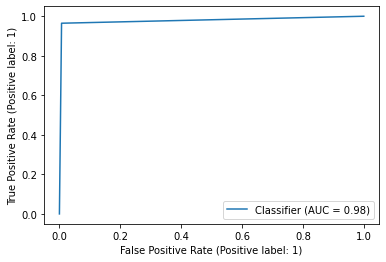

Test confusion matrix:
[[71  1]
 [ 0 42]]
Test ROC curve:


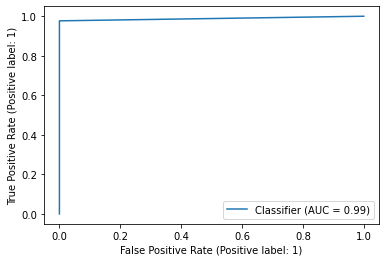

In [20]:
train_accuracies_i = []
train_precisions_i = []
train_recalls_i = []
train_f1_scores_i = []
train_aucs_i = []

test_accuracies_i = []
test_precisions_i = []
test_recalls_i = []
test_f1_scores_i = []
test_aucs_i = []

random_iteration = random.randint(0,29)

parameters = {"C" : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]}

for m in range (30):
    # Split data.
    X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2, stratify = dataframe["Diagnosis"])
    
    # Normalize data.
    X_train_scaled = MinMaxScaler().fit_transform(X_train)
    X_test_scaled = MinMaxScaler().fit_transform(X_test)
    
    # Grid search for best parameter.
    grid = GridSearchCV(LinearSVC(penalty = "l1", dual = False, max_iter = 1000000), parameters, cv = 5)
    grid.fit(X_train_scaled, y_train["Diagnosis"])
    
    y_preds_test = grid.predict(X_test_scaled)
    y_preds_train = grid.predict(X_train_scaled)
    
    # Training metrics.
    training_precision = precision_score(y_train, y_preds_train)
    training_recall = recall_score(y_train, y_preds_train)
    training_accuracy = accuracy_score(y_train, y_preds_train)
    training_f1_score = (2*training_recall*training_precision) / (training_recall + training_precision)
    training_auc_score = roc_auc_score(y_train, y_preds_train)
    
    train_accuracies_i.append(training_accuracy)
    train_precisions_i.append(training_precision)
    train_recalls_i.append(training_recall)
    train_f1_scores_i.append(training_f1_score)
    train_aucs_i.append(training_auc_score)

    # Test metrics.
    test_precision = precision_score(y_test, y_preds_test)
    test_recall = recall_score(y_test, y_preds_test)
    test_accuracy = accuracy_score(y_test, y_preds_test)
    test_f1_score = (2*test_recall*test_precision) / (test_recall + test_precision)
    test_auc_score = roc_auc_score(y_test, y_preds_test)
    
    test_accuracies_i.append(test_accuracy)
    test_precisions_i.append(test_precision)
    test_recalls_i.append(test_recall)
    test_f1_scores_i.append(test_f1_score)
    test_aucs_i.append(test_auc_score)
    
    # Plot the ROC curve for 1 random iteration.
    if m == random_iteration:
        print("Training confusion matrix:")
        print(confusion_matrix(y_train, y_preds_train))
        print("Training ROC curve:")
        training_roc = metrics.RocCurveDisplay.from_predictions(y_train, y_preds_train)
        plt.show()
              
        print("Test confusion matrix:")
        print(confusion_matrix(y_test, y_preds_test))
        print("Test ROC curve:")
        test_roc = metrics.RocCurveDisplay.from_predictions(y_preds_test, y_test)
        plt.show()

In [21]:
print("Average training accuracy score:", statistics.mean(train_accuracies_i))
print("Average training precision score:", statistics.mean(train_precisions_i))
print("Average training recall score:", statistics.mean(train_recalls_i))
print("Average training F1 score:", statistics.mean(train_f1_scores_i))
print("Average training AUC score:", statistics.mean(train_aucs_i))

Average training accuracy score: 0.9862271062271062
Average training precision score: 0.9908042577132911
Average training recall score: 0.972156862745098
Average training F1 score: 0.981361731576902
Average training AUC score: 0.9833883728930168


In [22]:
print("Average test accuracy score:", statistics.mean(test_accuracies_i))
print("Average test precision score:", statistics.mean(test_precisions_i))
print("Average test recall score:", statistics.mean(test_recalls_i))
print("Average test F1 score:", statistics.mean(test_f1_scores_i))
print("Average test AUC score:", statistics.mean(test_aucs_i))

Average test accuracy score: 0.9070175438596491
Average test precision score: 0.8247903948137547
Average test recall score: 0.9801587301587301
Average test F1 score: 0.8908043179268692
Average test AUC score: 0.922255291005291


**ii. Semi-Supervised Learning/ Self-training: select 50% of the positive
class along with 50% of the negative class in the training set as labeled data
and the rest as unlabelled data. You can select them randomly.**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2, stratify = dataframe["Diagnosis"])
X_test_scaled = MinMaxScaler().fit_transform(X_test)

Training confusion matrix:
[[186  99]
 [111  59]]
Training ROC curve:


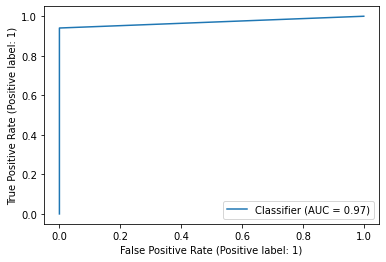

Test confusion matrix:
[[72  0]
 [ 1 41]]
Test ROC curve:


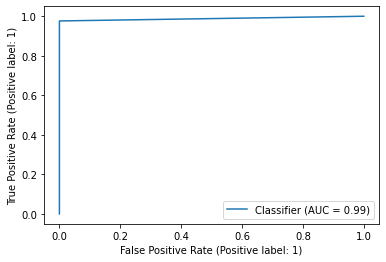

In [24]:
train_accuracies_ii = []
train_precisions_ii = []
train_recalls_ii = []
train_f1_scores_ii = []
train_aucs_ii = []

test_accuracies_ii = []
test_precisions_ii = []
test_recalls_ii = []
test_f1_scores_ii = []
test_aucs_ii = []

random_iteration = random.randint(0,29)

parameters = {"C" : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]}

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2, stratify = dataframe["Diagnosis"])
X_test_scaled = MinMaxScaler().fit_transform(X_test)

for m in range(30):
    training_set = pd.concat([X_train, y_train], axis = 1)
    
#     A. Train an L1-penalized SVM to classify the labeled data Use normalized
#     data. Choose the penalty parameter using 5 fold cross validation.

    X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X_train, y_train,  
                                                                      test_size = 0.5, stratify = training_set["Diagnosis"])
    
    X_labeled_scaled = MinMaxScaler().fit_transform(X_labeled)
    X_unlabeled_scaled = MinMaxScaler().fit_transform(X_unlabeled)
    
    grid = GridSearchCV(LinearSVC(penalty = "l1", dual = False, max_iter = 1000000), parameters, cv = 5)
    grid.fit(X_labeled_scaled, y_labeled["Diagnosis"])
    
    linear_svc = LinearSVC(penalty = "l1", dual = False, max_iter = 1000000, C = grid.best_params_["C"])
    linear_svc.fit(X_labeled_scaled, y_labeled["Diagnosis"])

#     B. Find the unlabeled data point that is the farthest to the decision boundary
#     of the SVM. Let the SVM label it (ignore its true label), and add it to
#     the labeled data, and retrain the SVM. Continue this process until all
#     unlabeled data are used. Test the final SVM on the test data andthe
#     average accuracy, precision, recall, F1-score, and AUC, for both training
#     and test sets over your M runs. Plot the ROC and report the confusion
#     matrix for training and testing in one of the runs.
    
    ys = linear_svc.decision_function(X_unlabeled_scaled)
    w_norm = np.linalg.norm(linear_svc.coef_)
    distances = list(abs(ys / w_norm))

    for i in range(228):
        max_index = distances.index(max(distances))
        distances.pop(max_index)
        furthest_point_X = X_unlabeled.iloc[max_index].to_frame().T
        furthest_point_y = y_unlabeled.iloc[max_index].to_frame().T
        X_labeled = X_labeled.append(furthest_point_X)
        y_labeled =  y_labeled.append(furthest_point_y)
        X_labeled_scaled = MinMaxScaler().fit_transform(X_labeled)
        linear_svc.fit(X_labeled_scaled, y_labeled["Diagnosis"])
        
    y_preds_test = linear_svc.predict(X_test_scaled)
    y_preds_train = linear_svc.predict(X_labeled_scaled)
        
    # Training metrics.
    training_precision = precision_score(y_labeled["Diagnosis"], y_preds_train)
    training_recall = recall_score(y_labeled["Diagnosis"], y_preds_train)
    training_accuracy = accuracy_score(y_labeled["Diagnosis"], y_preds_train)
    training_f1_score = (2*training_recall*training_precision) / (training_recall + training_precision)
    training_auc_score = roc_auc_score(y_labeled["Diagnosis"], y_preds_train)
    
    train_accuracies_ii.append(training_accuracy)
    train_precisions_ii.append(training_precision)
    train_recalls_ii.append(training_recall)
    train_f1_scores_ii.append(training_f1_score)
    train_aucs_ii.append(training_auc_score)

    # Test metrics.
    test_precision = precision_score(y_test, y_preds_test)
    test_recall = recall_score(y_test, y_preds_test)
    test_accuracy = accuracy_score(y_test, y_preds_test)
    test_f1_score = (2*test_recall*test_precision) / (test_recall + test_precision)
    test_auc_score = roc_auc_score(y_test, y_preds_test)
    
    test_accuracies_ii.append(test_accuracy)
    test_precisions_ii.append(test_precision)
    test_recalls_ii.append(test_recall)
    test_f1_scores_ii.append(test_f1_score)
    test_aucs_ii.append(test_auc_score)
    
    # Plot the ROC curve for 1 random iteration.
    if m == random_iteration:
        print("Training confusion matrix:")
        print(confusion_matrix(y_train, y_preds_train))
        print("Training ROC curve:")
        training_roc = metrics.RocCurveDisplay.from_predictions(y_labeled["Diagnosis"], y_preds_train)
        plt.show()
              
        print("Test confusion matrix:")
        print(confusion_matrix(y_test, y_preds_test))
        print("Test ROC curve:")
        test_roc = metrics.RocCurveDisplay.from_predictions(y_test, y_preds_test)
        plt.show()

In [25]:
print("Last SVM test accuracy score:", test_accuracies_ii[-1])
print("Last SVM test precision score:", test_precisions_ii[-1])
print("Last SVM test recall score:", test_recalls_ii[-1])
print("Last SVM test F1 score:", test_f1_scores_ii[-1])
print("Last SVM test AUC score:", test_aucs_ii[-1])

Last SVM test accuracy score: 0.956140350877193
Last SVM test precision score: 0.9111111111111111
Last SVM test recall score: 0.9761904761904762
Last SVM test F1 score: 0.9425287356321839
Last SVM test AUC score: 0.9603174603174603


In [26]:
print("Average training accuracy score:", statistics.mean(train_accuracies_ii))
print("Average training precision score:", statistics.mean(train_precisions_ii))
print("Average training recall score:", statistics.mean(train_recalls_ii))
print("Average training F1 score:", statistics.mean(train_f1_scores_ii))
print("Average training AUC score:", statistics.mean(train_aucs_ii))

Average training accuracy score: 0.9868131868131869
Average training precision score: 0.9958363850162983
Average training recall score: 0.9691802716552467
Average training F1 score: 0.9822597454089593
Average training AUC score: 0.9833460991273854


In [27]:
print("Average test accuracy score:", statistics.mean(test_accuracies_ii))
print("Average test precision score:", statistics.mean(test_precisions_ii))
print("Average test recall score:", statistics.mean(test_recalls_ii))
print("Average test F1 score:", statistics.mean(test_f1_scores_ii))
print("Average test AUC score:", statistics.mean(test_aucs_ii))

Average test accuracy score: 0.9546783625730995
Average test precision score: 0.9208139944166234
Average test recall score: 0.9746031746031746
Average test F1 score: 0.9437164828627493
Average test AUC score: 0.9588293650793651


**iii. Unsupervised Learning: Run k-means algorithm on the whole training
set. Ignore the labels of the data, and assume k = 2.**

**Avoiding local minimum**

We can lower the chance of running into a local minimum by running the kmeans algorithm multiple times with different random initial conditions then select the model with the lowest Within-Cluster Variation.

Training confusion matrix:
[[284   1]
 [ 64 106]]
Training ROC curve:


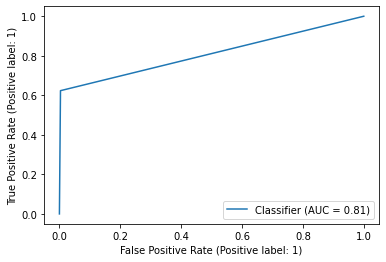

Test confusion matrix:
[[72  0]
 [18 24]]
Test ROC curve:


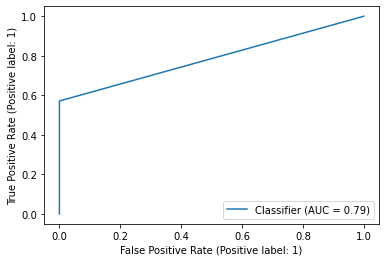

In [28]:
train_accuracies_iii = []
train_precisions_iii = []
train_recalls_iii = []
train_f1_scores_iii = []
train_aucs_iii = []

test_accuracies_iii = []
test_precisions_iii = []
test_recalls_iii = []
test_f1_scores_iii = []
test_aucs_iii = []

random_iteration = random.randint(0,29)

for m in range(30):
#     A. Run the k-means algorithm multiple times. Make sure that you initialize
#     the algoritm randomly. How do you make sure that the algorithm was
#     not trapped in a local minimum?

    kmeans = KMeans(n_clusters = 2)
    kmeans.fit(X_train)
    
    centroid_1 = kmeans.cluster_centers_[0]
    centroid_2 = kmeans.cluster_centers_[1]

    cluster_labels = kmeans.predict(X_train)

#     B. Compute the centers of the two clusters and find the closest 30 data
#     points to each center. Read the true labels of those 30 data points and
#     take a majority poll within them. The majority poll becomes the label
#     predicted by k-means for the members of each cluster. Then compare the
#     labels provided by k-means with the true labels of the training data and
#     report the average accuracy, precision, recall, F1-score, and AUC over M
#     runs, and ROC and the confusion matrix for one of the runs.1

    centroid_1_distances = []
    for point in X_train.values:
        distance = np.linalg.norm(centroid_1 - point)
        centroid_1_distances.append(distance)
    
    true_labels_centroid_1 = []
    for index in np.array(centroid_1_distances).argsort()[:30]:
        true_label = y_train["Diagnosis"].iloc[index]
        true_labels_centroid_1.append(true_label)
    
    centroid_2_distances = []
    for point in X_train.values:
        distance = np.linalg.norm(centroid_2 - point)
        centroid_2_distances.append(distance)
    
    true_labels_centroid_2 = []
    for index in np.array(centroid_2_distances).argsort()[:30]:
        true_label = y_train["Diagnosis"].iloc[index]
        true_labels_centroid_2.append(true_label)
    
    training_predicted_labels = []
    
    counter_1 = Counter(true_labels_centroid_1)
    counter_2 = Counter(true_labels_centroid_2)
    
    for item in cluster_labels:
        if item == 0:
            training_predicted_labels.append(counter_1.most_common(1)[0][0])
        else:
            training_predicted_labels.append(counter_2.most_common(1)[0][0])
            
    # Training metrics.
    training_precision = precision_score(y_train["Diagnosis"], training_predicted_labels)
    training_recall = recall_score(y_train["Diagnosis"], training_predicted_labels)
    training_accuracy = accuracy_score(y_train["Diagnosis"], training_predicted_labels)
    training_f1_score = (2*training_recall*training_precision) / (training_recall + training_precision)
    training_auc_score = roc_auc_score(y_train["Diagnosis"], training_predicted_labels)
    
    train_accuracies_iii.append(training_accuracy)
    train_precisions_iii.append(training_precision)
    train_recalls_iii.append(training_recall)
    train_f1_scores_iii.append(training_f1_score)
    train_aucs_iii.append(training_auc_score)

#    ---
    test_predicted_labels = []
    for point in X_test.values:
        distance_1 = np.linalg.norm(centroid_1 - point)
        distance_2 = np.linalg.norm(centroid_2 - point)
        if distance_1 > distance_2:
            test_predicted_labels.append(counter_2.most_common(1)[0][0])
        else:
            test_predicted_labels.append(counter_1.most_common(1)[0][0])   

    # Test metrics.
    test_precision = precision_score(y_test["Diagnosis"], test_predicted_labels,)
    test_recall = recall_score(y_test["Diagnosis"], test_predicted_labels)
    test_accuracy = accuracy_score(y_test["Diagnosis"], test_predicted_labels)
    test_f1_score = (2*test_recall*test_precision) / (test_recall + test_precision)
    test_auc_score = roc_auc_score(y_test["Diagnosis"], test_predicted_labels)
    
    test_accuracies_iii.append(test_accuracy)
    test_precisions_iii.append(test_precision)
    test_recalls_iii.append(test_recall)
    test_f1_scores_iii.append(test_f1_score)
    test_aucs_iii.append(test_auc_score)
    
    # Plot the ROC curve for 1 random iteration.
    if m == random_iteration:
        print("Training confusion matrix:")
        print(confusion_matrix(y_train["Diagnosis"], training_predicted_labels))
        print("Training ROC curve:")
        training_roc = metrics.RocCurveDisplay.from_predictions(y_train["Diagnosis"], training_predicted_labels)
        plt.show()
              
        print("Test confusion matrix:")
        print(confusion_matrix(y_test["Diagnosis"], test_predicted_labels))
        print("Test ROC curve:")
        test_roc = metrics.RocCurveDisplay.from_predictions(y_test["Diagnosis"], test_predicted_labels)
        plt.show()

In [29]:
print("Average training accuracy score:", statistics.mean(train_accuracies_iii))
print("Average training precision score:", statistics.mean(train_precisions_iii))
print("Average training recall score:", statistics.mean(train_recalls_iii))
print("Average training F1 score:", statistics.mean(train_f1_scores_iii))
print("Average training AUC score:", statistics.mean(train_aucs_iii))

Average training accuracy score: 0.8571428571428571
Average training precision score: 0.9906542056074766
Average training recall score: 0.6235294117647059
Average training F1 score: 0.7653429602888088
Average training AUC score: 0.8100103199174407


In [30]:
print("Average test accuracy score:", statistics.mean(test_accuracies_iii))
print("Average test precision score:", statistics.mean(test_precisions_iii))
print("Average test recall score:", statistics.mean(test_recalls_iii))
print("Average test F1 score:", statistics.mean(test_f1_scores_iii))
print("Average test AUC score:", statistics.mean(test_aucs_iii))

Average test accuracy score: 0.8421052631578947
Average test precision score: 1.0
Average test recall score: 0.5714285714285714
Average test F1 score: 0.7272727272727273
Average test AUC score: 0.7857142857142857


**iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clus-
tering based on kernels.3 Research what spectral clustering is. Use RBF
kernel with gamma=1 or find a gamma for which the two clutsres have the
same balance as the one in original data set (if the positive class has p and the
negative class has n samples, the two clusters must have p and n members).
Do not label data based on their proximity to cluster center, because spectral
clustering may give you non-convex clusters . Instead, use fit - predict
method.**

Training confusion matrix:
[[285   0]
 [170   0]]
Training ROC curve:


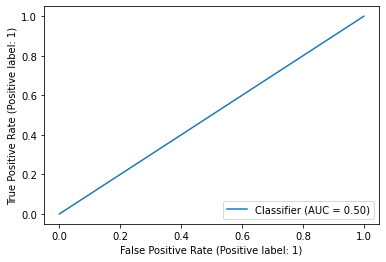

Test confusion matrix:
[[72  0]
 [42  0]]
Test ROC curve:


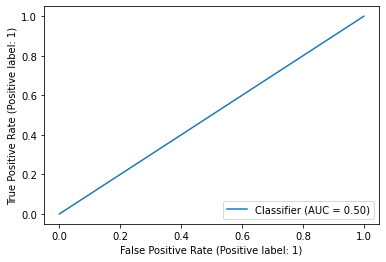

In [31]:
train_accuracies_iv = []
train_precisions_iv = []
train_recalls_iv = []
train_f1_scores_iv = []
train_aucs_iv = []

test_accuracies_iv = []
test_precisions_iv = []
test_recalls_iv = []
test_f1_scores_iv = []
test_aucs_iv = []

random_iteration = random.randint(0,29)

for m in range(30):
    spectral = SpectralClustering(gamma=10000, affinity='rbf', n_clusters = 2, assign_labels = "cluster_qr")
    cluster_labels = spectral.fit_predict(X_train)

    cluster_1 = []
    cluster_2 = []
    
    for index, true_label in enumerate(y_train["Diagnosis"]):
        if cluster_labels[index] == 0:
            cluster_1.append(true_label)
        else:
            cluster_2.append(true_label)
            
    counter_1 = Counter(cluster_1)
    counter_2 = Counter(cluster_2)
    
    training_predicted_labels = []
    
    for item in cluster_labels:
        if item == 0:
            training_predicted_labels.append(counter_1.most_common(1)[0][0])
        else:
            training_predicted_labels.append(counter_2.most_common(1)[0][0])

    # Training metrics.
    training_precision = precision_score(y_train["Diagnosis"], training_predicted_labels, average='weighted')
    training_recall = recall_score(y_train["Diagnosis"], training_predicted_labels, average='weighted')
    training_accuracy = accuracy_score(y_train["Diagnosis"], training_predicted_labels)
    training_f1_score = (2*training_recall*training_precision) / (training_recall + training_precision)
    training_auc_score = roc_auc_score(y_train["Diagnosis"], training_predicted_labels)
    
    train_accuracies_iv.append(training_accuracy)
    train_precisions_iv.append(training_precision)
    train_recalls_iv.append(training_recall)
    train_f1_scores_iv.append(training_f1_score)
    train_aucs_iv.append(training_auc_score)
    
    # Test the test data with KNN.
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(X_train, training_predicted_labels)
    test_predicted_labels = knn.predict(X_test)

    # Test metrics.
    test_precision = precision_score(y_test["Diagnosis"], test_predicted_labels, average='weighted')
    test_recall = recall_score(y_test["Diagnosis"], test_predicted_labels, average='weighted')
    test_accuracy = accuracy_score(y_test["Diagnosis"], test_predicted_labels)
    test_f1_score = (2*test_recall*test_precision) / (test_recall + test_precision)
    test_auc_score = roc_auc_score(y_test["Diagnosis"], test_predicted_labels)
    
    test_accuracies_iv.append(test_accuracy)
    test_precisions_iv.append(test_precision)
    test_recalls_iv.append(test_recall)
    test_f1_scores_iv.append(test_f1_score)
    test_aucs_iv.append(test_auc_score)
    
    # Plot the ROC curve for 1 random iteration.
    if m == random_iteration:
        print("Training confusion matrix:")
        print(confusion_matrix(y_train["Diagnosis"], training_predicted_labels))
        print("Training ROC curve:")
        training_roc = metrics.RocCurveDisplay.from_predictions(y_train["Diagnosis"], training_predicted_labels)
        plt.show()
              
        print("Test confusion matrix:")
        print(confusion_matrix(y_test["Diagnosis"], test_predicted_labels))
        print("Test ROC curve:")
        test_roc = metrics.RocCurveDisplay.from_predictions(y_test["Diagnosis"], test_predicted_labels)
        plt.show()

In [33]:
print("Average training accuracy score:", statistics.mean(train_accuracies_iv))
print("Average training precision score:", statistics.mean(train_precisions_iv))
print("Average training recall score:", statistics.mean(train_recalls_iv))
print("Average training F1 score:", statistics.mean(train_f1_scores_iv))
print("Average training AUC score:", statistics.mean(train_aucs_iv))

Average training accuracy score: 0.6263736263736264
Average training precision score: 0.3923439198164473
Average training recall score: 0.6263736263736264
Average training F1 score: 0.48247698247698245
Average training AUC score: 0.5


In [34]:
print("Average test accuracy score:", statistics.mean(test_accuracies_iv))
print("Average test precision score:", statistics.mean(test_precisions_iv))
print("Average test recall score:", statistics.mean(test_recalls_iv))
print("Average test F1 score:", statistics.mean(test_f1_scores_iv))
print("Average test AUC score:", statistics.mean(test_aucs_iv))

Average test accuracy score: 0.631578947368421
Average test precision score: 0.39889196675900274
Average test recall score: 0.631578947368421
Average test F1 score: 0.48896434634974534
Average test AUC score: 0.5


**v. One can expect that supervised learning on the full data set works better than
semi-supervised learning with half of the data set labeled.One can expect that
unsupervised learning underperforms in such situations. Compare the results
you obtained by those methods.**

We can see that the **SVM (supervised) algorithm** and the **Semi-supervised algorithm** worked better with the following average test scores:
* Average test accuracy score: 0.9070175438596491
* Average test precision score: 0.8247903948137547
* Average test recall score: 0.9801587301587301
* Average test F1 score: 0.8908043179268692
* Average test AUC score: 0.922255291005291

* Average test accuracy score: 0.9546783625730995
* Average test precision score: 0.9208139944166234
* Average test recall score: 0.9746031746031746
* Average test F1 score: 0.9437164828627493
* Average test AUC score: 0.9588293650793651

Constrastly, the **Spectral Clustering algorithm** did not perform as good, its F1-score was below 0.5 and the other metrics were not as high as those of the supervised algorithms: 
* Average test accuracy score: 0.631578947368421
* Average test precision score: 0.39889196675900274
* Average test recall score: 0.631578947368421
* Average test F1 score: 0.48896434634974534
* Average test AUC score: 0.5

**Conclusion**: The supervised learning algorithm and the semi-supervised learning algorithm with 50% of the dataset worked better than the unsupervised learning algorithms.

**2. Active Learning Using Support Vector Machines**

**(a) Download the banknote authentication Data Set from: https://archive.ics.
uci.edu/ml/datasets/banknote+authentication. Choose 472 data points ran-
domly as the test set, and the remaining 900 points as the training set. This is a
binary classification problem.**

In [35]:
dataframe = pd.read_csv("../data/data_banknote_authentication.txt", names = ["Variance", "Skewness", "Curtosis", "Entropy", "Class"])

In [36]:
dataframe

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [37]:
X = dataframe.drop(["Class"], axis = 1)
y = dataframe[["Class"]]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=472, random_state = 4)

**(b) Repeat each of the following two procedures 50 times. You will have 50 errors for
90 SVMs per each procedure.**

**i. Train a SVM with a pool of 10 randomly selected data points from the training
set using linear kernel and L1 penalty. Select the penalty parameter using
5-fold cross validation.4 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT
replace the samples back into the training set at each step. Calculate the
test error for each SVM. You will have 90 SVMs that were trained using 10,
20, 30, ... , 900 data points and their 90 test errors. You have implemented
passive learning.**

In [39]:
test_errors = []
training_set = pd.concat([X_train, y_train], axis = 1)
test_set = pd.concat([X_test, y_test], axis = 1)
parameters = {"C" : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]}

X_test_scaled = MinMaxScaler().fit_transform(X_test)

for m in range(50):
    test_error = []
    training_set = training_set.sample(frac = 1)
    split_datasets = np.array_split(training_set, 90)
    
    grid = GridSearchCV(LinearSVC(penalty = "l1", dual = False, max_iter = 1000000), parameters, cv = 5)
    
    X_train_90_stack = split_datasets[0].drop(["Class"], axis = 1)
    y_train_90_stack = split_datasets[0][["Class"]]
    
    for count in range(0,90):
   
        X_train_scaled = MinMaxScaler().fit_transform(X_train_90_stack)
        try:
            grid.fit(X_train_scaled, y_train_90_stack["Class"])
            y_preds = grid.predict(X_test_scaled)
        
        except:
            y_preds =  np.full(len(y_train_90_stack["Class"], y_train_90_stack["Class"][0]))
            
        test_error.append(1 - accuracy_score(y_test, y_preds))
        
        if count == 89:
            break
        X_train_90_stack = pd.concat([X_train_90_stack, split_datasets[count+1].drop(["Class"], axis = 1)])
        y_train_90_stack = pd.concat([y_train_90_stack, split_datasets[count+1][["Class"]]])
        
    test_errors.append(test_error)

**ii. Train a SVM with a pool of 10 randomly selected data points from the training
set5 using linear kernel and L1 penalty. Select the parameters of the SVM
with 5-fold cross validation. Choose the 10 closest data points in the training
set to the hyperplane of the SVM6 and add them to the pool. Do not replace
the samples back into the training set. Train a new SVM using the pool.
Repeat this process until all training data is used. You will have 90 SVMs
that were trained using 10, 20, 30,..., 900 data points and their 90 test errors.
You have implemented active learning.**

In [40]:
test_errors_ii = []
training_set = pd.concat([X_train, y_train], axis = 1)
test_set = pd.concat([X_test, y_test], axis = 1)
parameters = {"C" : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]}

X_test_scaled = MinMaxScaler().fit_transform(X_test)

for m in range(50):
    test_error = []
    training_set = training_set.sample(frac = 1)
    split_datasets = np.array_split(training_set, 90)
    
    X_pool_1 = split_datasets[0].drop(["Class"], axis = 1)
    y_pool_1 = split_datasets[0][["Class"]]
    
    X_pool_rest = split_datasets[1].drop(["Class"], axis = 1)
    y_pool_rest = split_datasets[1][["Class"]]
    
    for i in range(2,90):
        X_pool_rest = pd.concat([X_pool_rest, split_datasets[i].drop(["Class"], axis = 1)])
        y_pool_rest = pd.concat([y_pool_rest, split_datasets[i][["Class"]]])
    
    X_train_scaled = MinMaxScaler().fit_transform(X_pool_1)
    X_pool_rest_scaled = MinMaxScaler().fit_transform(X_pool_rest)
    grid = GridSearchCV(LinearSVC(penalty = "l1", dual = False, max_iter = 100000), parameters, cv = 5)
    grid.fit(X_train_scaled, y_pool_1["Class"])
    
    linear_svc = LinearSVC(penalty = "l1", dual = False, max_iter = 100000, C = grid.best_params_["C"])
    linear_svc.fit(X_train_scaled, y_pool_1["Class"])
    
    ys = linear_svc.decision_function(X_pool_rest_scaled)
    w_norm = np.linalg.norm(linear_svc.coef_)
    distances = list(abs(ys / w_norm))

    test_error.append(1 - accuracy_score(y_test, linear_svc.predict(X_test_scaled)))
    
    for count in range(89):
        min_indexes = np.argsort(distances)[:10]

        for index in sorted(min_indexes, reverse=True):
            del distances[index]

        for index in min_indexes:
            closest_point_X = X_pool_rest.iloc[index].to_frame().T
            closest_point_y = y_pool_rest.iloc[index].to_frame().T
            X_pool_1 = X_pool_1.append(closest_point_X)
            y_pool_1 = y_pool_1.append(closest_point_y)
            
        X_train_scaled = MinMaxScaler().fit_transform(X_pool_1)
        linear_svc.fit(X_train_scaled, y_pool_1["Class"])
        y_preds = linear_svc.predict(X_test_scaled)
        test_error.append(1 - accuracy_score(y_test, y_preds))
        
    test_errors_ii.append(test_error)

**(c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i
and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot
average test error versus number of training instances for both active and passive
learners on the same figure and report your conclusions. Here, you are actually
obtaining a learning curve by Monte-Carlo simulation.**

In [41]:
active_results = pd.DataFrame(test_errors)
passive_results = pd.DataFrame(test_errors_ii)

In [42]:
# 50 x 90 error table for active learning. 

active_results

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.146186,0.065678,0.072034,0.038136,0.031780,0.027542,0.027542,0.029661,0.025424,0.025424,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
1,0.105932,0.099576,0.055085,0.023305,0.023305,0.010593,0.012712,0.038136,0.029661,0.031780,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
2,0.135593,0.042373,0.046610,0.042373,0.036017,0.036017,0.036017,0.027542,0.040254,0.023305,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
3,0.139831,0.213983,0.042373,0.052966,0.038136,0.027542,0.021186,0.023305,0.023305,0.023305,...,0.021186,0.019068,0.010593,0.010593,0.019068,0.019068,0.019068,0.010593,0.010593,0.010593
4,0.086864,0.033898,0.069915,0.095339,0.061441,0.038136,0.031780,0.033898,0.036017,0.033898,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
5,0.241525,0.023305,0.046610,0.038136,0.038136,0.021186,0.021186,0.029661,0.014831,0.014831,...,0.019068,0.010593,0.010593,0.019068,0.019068,0.010593,0.019068,0.010593,0.010593,0.010593
6,0.213983,0.156780,0.190678,0.137712,0.036017,0.057203,0.057203,0.061441,0.052966,0.052966,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
7,0.173729,0.169492,0.141949,0.173729,0.163136,0.161017,0.057203,0.055085,0.046610,0.050847,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
8,0.370763,0.334746,0.188559,0.131356,0.055085,0.057203,0.059322,0.091102,0.052966,0.050847,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
9,0.360169,0.065678,0.171610,0.139831,0.023305,0.031780,0.040254,0.036017,0.036017,0.023305,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593


In [43]:
# 50 x 90 error table for passive learning. 

passive_results

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.233051,0.055085,0.036017,0.033898,0.074153,0.095339,0.065678,0.050847,0.042373,0.042373,...,0.023305,0.023305,0.023305,0.023305,0.023305,0.023305,0.023305,0.023305,0.023305,0.023305
1,0.319915,0.131356,0.135593,0.059322,0.048729,0.031780,0.040254,0.048729,0.044492,0.044492,...,0.025424,0.025424,0.025424,0.025424,0.025424,0.025424,0.025424,0.025424,0.025424,0.025424
2,0.275424,0.209746,0.014831,0.025424,0.029661,0.029661,0.025424,0.025424,0.033898,0.033898,...,0.025424,0.025424,0.025424,0.025424,0.025424,0.025424,0.025424,0.025424,0.025424,0.025424
3,0.203390,0.243644,0.207627,0.057203,0.052966,0.040254,0.038136,0.038136,0.036017,0.040254,...,0.025424,0.023305,0.025424,0.025424,0.023305,0.025424,0.023305,0.023305,0.025424,0.025424
4,0.434322,0.434322,0.434322,0.434322,0.434322,0.434322,0.434322,0.434322,0.434322,0.434322,...,0.434322,0.434322,0.434322,0.434322,0.434322,0.434322,0.434322,0.434322,0.434322,0.434322
5,0.224576,0.266949,0.309322,0.190678,0.144068,0.055085,0.055085,0.074153,0.074153,0.074153,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
6,0.281780,0.207627,0.186441,0.050847,0.016949,0.036017,0.036017,0.033898,0.031780,0.031780,...,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186
7,0.548729,0.449153,0.375000,0.213983,0.065678,0.038136,0.040254,0.033898,0.029661,0.025424,...,0.010593,0.010593,0.010593,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.021186
8,0.156780,0.271186,0.052966,0.076271,0.031780,0.031780,0.029661,0.029661,0.023305,0.023305,...,0.021186,0.021186,0.021186,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068
9,0.186441,0.036017,0.027542,0.029661,0.025424,0.025424,0.027542,0.027542,0.027542,0.025424,...,0.021186,0.021186,0.021186,0.021186,0.019068,0.019068,0.021186,0.021186,0.021186,0.021186


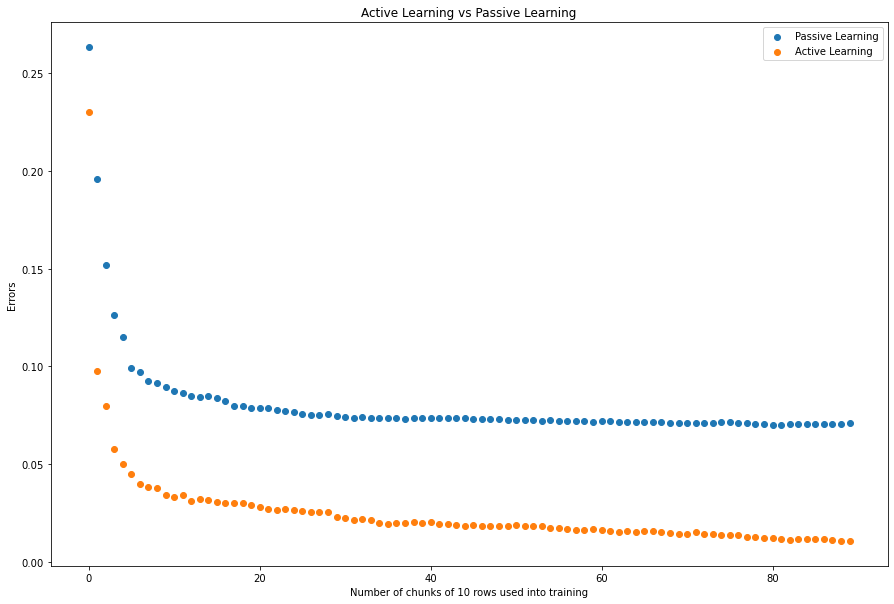

In [44]:
plt.rcParams["figure.figsize"] = (15,10)
plt.scatter(passive_results.mean().index, passive_results.mean())
plt.scatter(active_results.mean().index, active_results.mean())
plt.legend(["Passive Learning", "Active Learning"])
plt.xlabel("Number of chunks of 10 rows used into training")
plt.ylabel("Errors")
plt.title("Active Learning vs Passive Learning")
plt.show()

**Conclusion**

As we can see from the plot, both styles of learning showed a steady decrease in average errors with more datapoints added to the training set. However, Active Learning performed better overall. At 90 chunks (900 datapoints), Active Learning gave an average error of 0.01, while Passive Learning's result was at around 0.075. 